In [3]:
import pandas as pd
import numpy as np
import unicodedata
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


2024-03-12 15:19:41.737238: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-12 15:19:41.757970: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-12 15:19:41.870763: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 15:19:41.870837: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 15:19:41.888517: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

# Lyrics Text Normalization

This script reads an Excel file containing lyrics data, normalizes the text in the lyrics, and saves the modified data back to an Excel file.

## Steps

1. **Read the Excel file**: The pandas library is used to read the Excel file containing the lyrics data. The file path is specified in the code.

2. **Normalize text**: A function `normalize_text` is defined to normalize the text in the lyrics. This function converts the text to lowercase, normalizes whitespace, and keeps only certain punctuation marks. It uses the `unicodedata` library to categorize characters.

3. **Apply the normalization function**: The `normalize_text` function is applied to the 'Lyrics' column of the DataFrame. The normalized texts are stored in a new column 'NormalizedText'.

4. **Save the modified DataFrame**: The modified DataFrame, which now includes the normalized text, is saved to an Excel file. The output file path is specified in the code.


In [4]:
import pandas as pd
import unicodedata
df = pd.read_excel('./DataSets/Lyrics Training Data GPT Generated.xlsx', engine='openpyxl')

def normalize_text(texts):
    normalized_texts = []
    keep_punctuation = {"'", "-", "’"}  # Add or remove characters as needed
    for text in texts:
        try:
            text = str(text).lower()  # Convert to lowercase and ensure text is string
            text = ' '.join(text.split())  # Normalize whitespace
            # Iterate over each character in the text
            # and include it in the output if it meets certain conditions
            text = ''.join(
                char for char in text 
                if unicodedata.category(char)[0] in ('L', 'N', 'Z')  # Check if the character is a letter, number, or space
                or char in keep_punctuation  # Or if the character is in the custom set of punctuation marks to keep
            )

            normalized_texts.append(text)
        except Exception as e:
            print(f"Error processing text: {text} with error {e}")
            normalized_texts.append(text)  # Append original text or handle as needed
    return normalized_texts


# Normalize text
normalized_texts = normalize_text(df['Lyrics'].astype(str))

# Add the normalized text to the dataframe
df['NormalizedText'] = normalized_texts

# Save the modified DataFrame
output_path = './New DataSets/normalized_text.xlsx'  # Replace with a path that is not synced
df.to_excel(output_path, engine='openpyxl', index=False)


# Text Processing and Label Binarization in Python

This script reads an Excel file containing normalized text data, processes the text, converts language labels into a binary matrix, and writes the processed data back to a new Excel file.

## Libraries Used
- pandas: For data manipulation and analysis.
- sklearn.preprocessing: Provides a utility class MultiLabelBinarizer for transforming multiclass labels to binary labels.

## Steps
1. The required libraries are imported.
2. The normalized Excel file is read into a pandas DataFrame.
3. The 'Languages' column of the DataFrame is processed to convert the comma-separated string of languages into a list of languages.
4. The MultiLabelBinarizer is initialized.
5. The language labels are converted into a binary matrix.
6. A new DataFrame is created for the binary matrix with appropriate column names.
7. The original DataFrame is concatenated with the new binary matrix DataFrame.
8. The resulting DataFrame is written to a new Excel file.

Please ensure that the required libraries are installed in your Python environment before running this script.


In [5]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Step 1: Load the dataset
df = pd.read_excel("./New DataSets/normalized_text.xlsx")  # Update the path to where you've stored the file

# Step 2: Process the 'languages' column (ensure the column name is consistent)
df['Languages'] = df['languages'].apply(lambda x: [lang.strip() for lang in x.split(',') if lang.strip()])

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Convert language labels into a binary matrix format
binary_matrix = mlb.fit_transform(df['Languages'])  # Ensure we use the corrected 'Languages' column

# Convert the binary matrix back into a DataFrame for easy viewing/manipulation
binary_matrix_df = pd.DataFrame(binary_matrix, columns=mlb.classes_)

# Merge the binary matrix with the original DataFrame
df_combined = pd.concat([df, binary_matrix_df], axis=1)

# Save the combined DataFrame to a new Excel file
output_file_path = "./New DataSets/combined_normalized_text.xlsx"  # Specify your desired output file path
df_combined.to_excel(output_file_path, index=False)

print(f"Combined DataFrame saved to {output_file_path}")


Combined DataFrame saved to ./New DataSets/combined_normalized_text.xlsx


This Python code snippet is part of a data analysis process performed on a DataFrame `df`. The DataFrame `df` contains a column named 'Languages'.

The code applies a function to each element in the 'Languages' column. This function takes a list of languages (assumed to be the input), sorts the list, joins the sorted list into a string with each language separated by a comma, and returns the resulting string.

After the function is applied to each element in the 'Languages' column, the `unique()` function is called to get all unique resulting strings. This could be useful to understand the variety of language combinations in the data.



In [6]:
print(df['languages'].apply(lambda x: ','.join(sorted(x))).unique())


[',,,,A,E,F,N,R,R' ',,,,D,E,E,K,O,S' ',,,,E,H,I,N,R,U' ',,,,E,E,N,P,S,T'
 ',,,,E,F,I,N,R,T' ',,E,F,N,R' ',,A,F,R,R' ',,E,K,N,O' ',,E,I,S,T'
 ',,E,N,S,W' ',,D,E,E,N' ',,A,E,N,R' ',,E,E,N,S' ',,,,E,F,N,R' ',,E,I,N,S'
 ' ,,,E,P,S,T']


# Character Vocabulary

This Python script is used to process a dataset of normalized texts and create mappings between characters and indices. These mappings can be useful in many natural language processing tasks, such as text generation or machine translation.

Here is a step-by-step explanation of the code:

1. Import necessary libraries: `pandas` for data manipulation and `json` for saving data in JSON format.

2. Attempt to load the normalized text data from an Excel file. If the file does not exist, an error message is printed and the script is stopped.

3. Extract the 'NormalizedText' column from the DataFrame and convert it to a list.

4. Concatenate all normalized texts into one large string.

5. Identify and sort unique characters in the concatenated text.

6. Create a mapping from unique characters to indices. An 'UNK' (unknown) token is added for unseen characters.

7. Create a reverse mapping from indices to characters.

8. Display the mappings and the total number of unique characters (including 'UNK').

9. Save the mappings in JSON format for future use.

In [7]:
import pandas as pd
import json

# Attempt to load the normalized text data with error handling
file_path = './New DataSets/normalized_text.xlsx'  # Adjust the file path as needed
try:
    df = pd.read_excel(file_path, engine='openpyxl')
except FileNotFoundError:
    print(f"The specified file {file_path} does not exist.")
    # Consider adding additional error handling here, such as exiting the script
    raise

normalized_texts = df['NormalizedText'].tolist()  # Assuming the column name is 'NormalizedText'

# Concatenate all normalized texts into one large string
all_text = ''.join(normalized_texts)

# Identify and sort unique characters
unique_chars = sorted(set(all_text))

# Create a mapping from unique characters to indices, adding an 'UNK' (unknown) token for unseen characters
char_to_index = {'UNK': 0}  # Start with 'UNK' token mapped to 0
char_to_index.update({char: index + 1 for index, char in enumerate(unique_chars)})  # Shift indices by 1

# Create a reverse mapping from indices to characters
index_to_char = {index: char for char, index in char_to_index.items()}

# Display the mappings and total unique characters
print("Character to Index Mapping:")
print(char_to_index)
print("\nIndex to Character Mapping:")
print(index_to_char)
print(f"\nTotal unique characters (including 'UNK'): {len(char_to_index)}")

# Save the mappings for future use
with open('./New DataSets/JSON Files/char_to_index.json', 'w') as f:
    json.dump(char_to_index, f)
with open('./New DataSets/JSON Files/index_to_char.json', 'w') as f:
    json.dump(index_to_char, f)


Character to Index Mapping:
{'UNK': 0, ' ': 1, "'": 2, '-': 3, '0': 4, '1': 5, '2': 6, '3': 7, '6': 8, '9': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16, 'h': 17, 'i': 18, 'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24, 'p': 25, 'q': 26, 'r': 27, 's': 28, 't': 29, 'u': 30, 'v': 31, 'w': 32, 'x': 33, 'y': 34, 'z': 35, 'ß': 36, 'à': 37, 'á': 38, 'â': 39, 'ã': 40, 'ä': 41, 'æ': 42, 'ç': 43, 'è': 44, 'é': 45, 'ê': 46, 'í': 47, 'î': 48, 'ï': 49, 'ñ': 50, 'ó': 51, 'ô': 52, 'ö': 53, 'ù': 54, 'ú': 55, 'û': 56, 'ü': 57, 'œ': 58, 'а': 59, 'б': 60, 'в': 61, 'г': 62, 'д': 63, 'е': 64, 'ж': 65, 'з': 66, 'и': 67, 'й': 68, 'к': 69, 'л': 70, 'м': 71, 'н': 72, 'о': 73, 'п': 74, 'р': 75, 'с': 76, 'т': 77, 'у': 78, 'х': 79, 'ц': 80, 'ч': 81, 'ш': 82, 'щ': 83, 'ъ': 84, 'ы': 85, 'ь': 86, 'ю': 87, 'я': 88, 'ё': 89, 'ء': 90, 'آ': 91, 'أ': 92, 'إ': 93, 'ئ': 94, 'ا': 95, 'ب': 96, 'ة': 97, 'ت': 98, 'ث': 99, 'ج': 100, 'ح': 101, 'خ': 102, 'د': 103, 'ذ': 104, 'ر': 105, 'ز': 106, 'س': 107,

# Encode Lyrics
This Python function, `encode_lyrics`, is used to encode a list of lyrics into sequences of integers based on a character vocabulary. This is often a necessary step in preparing text data for machine learning models, especially those dealing with natural language processing.

Here is a step-by-step explanation of the function:

1. The function takes two parameters:
    - `lyrics_list`: A list of strings, where each string is a set of lyrics.
    - `char_to_index`: A dictionary mapping characters to their integer index.

2. An empty list, `encoded_lyrics`, is initialized to hold the encoded lyrics.

3. The function iterates over each set of lyrics in `lyrics_list`. For each set of lyrics, it encodes each character into an integer based on the `char_to_index` mapping. If a character is not found in the mapping, it is encoded as the 'UNK' (unknown) token.

4. The encoded lyrics are appended to the `encoded_lyrics` list.

5. After all lyrics have been encoded, the function returns the `encoded_lyrics` list.

In [8]:
def encode_lyrics(lyrics_list, char_to_index):
    """
    Encodes a list of lyrics into sequences of integers based on a character vocabulary.

    Parameters:
    - lyrics_list: A list of strings, where each string is a set of lyrics.
    - char_to_index: A dictionary mapping characters to their integer index.

    Returns:
    - A list of lists, where each sublist contains the encoded integers of the corresponding lyrics.
    """
    encoded_lyrics = []
    for lyrics in lyrics_list:
        encoded_lyric = [char_to_index.get(char, char_to_index['UNK']) for char in lyrics]
        encoded_lyrics.append(encoded_lyric)
    return encoded_lyrics


This Python script is used to load a character-to-index mapping from a JSON file and use it to encode the lyrics in a DataFrame. This is a continuation of the text processing pipeline for preparing data for machine learning models.

Here is a step-by-step explanation of the code:

1. The script assumes that the `char_to_index` mapping is already defined and loaded. If not, it will load the mapping from a JSON file named 'char_to_index.json'.

2. The script opens the 'char_to_index.json' file in read mode. It uses the `json.load()` function to load the JSON data into the `char_to_index` dictionary.

3. The script then encodes the lyrics in the DataFrame. It assumes that the DataFrame `df` has a column named 'NormalizedText' which contains the lyrics to be encoded.

4. The `encode_lyrics()` function is called with the list of lyrics and the `char_to_index` mapping as arguments. The function returns a list of encoded lyrics, which is then added to the DataFrame `df` as a new column named 'EncodedLyrics'.

In [9]:
# Assuming 'char_to_index' is already defined and loaded
# Load char_to_index mapping
with open('./New DataSets/JSON Files/char_to_index.json', 'r') as f:
    char_to_index = json.load(f)

# Encode the lyrics
df['EncodedLyrics'] = encode_lyrics(df['NormalizedText'].tolist(), char_to_index)


In [10]:
# Display the first few sets of encoded lyrics
print(df['EncodedLyrics'].head())


0    [18, 23, 1, 29, 17, 14, 1, 17, 14, 10, 27, 29,...
1    [11, 14, 23, 14, 10, 29, 17, 1, 29, 17, 14, 1,...
2    [18, 23, 1, 29, 17, 14, 1, 32, 17, 18, 28, 25,...
3    [18, 23, 1, 29, 17, 14, 1, 13, 10, 27, 20, 14,...
4    [18, 23, 1, 29, 17, 14, 1, 17, 14, 10, 27, 29,...
Name: EncodedLyrics, dtype: object


# Sequence Padding
This Python script is used to pad the encoded lyrics in a DataFrame to a uniform length. This is a common preprocessing step in machine learning tasks involving sequences, such as natural language processing or time series analysis.

Here is a step-by-step explanation of the code:

1. The script first determines the maximum sequence length to use for padding. This could be the length of the longest sequence in the 'EncodedLyrics' column of the DataFrame `df`, or it could be a predetermined length.

2. The script then pads the sequences in the 'EncodedLyrics' column to the maximum length. It uses the `pad_sequences()` function from the `keras.preprocessing.sequence` module, with the `maxlen` parameter set to the maximum length and the `padding` parameter set to 'post' to add padding at the end of the sequences.

3. The padded sequences are added to the DataFrame `df` as a new column named 'PaddedLyrics'.

4. Finally, the script prints the first few padded sequences to verify that the padding was applied correctly.#

In [11]:
# Determine the maximum sequence length you'd like to use
# This could be the length of the longest sequence or a predetermined length
max_length = max([len(seq) for seq in df['EncodedLyrics']])

# Pad the sequences
df['PaddedLyrics'] = list(pad_sequences(df['EncodedLyrics'], maxlen=max_length, padding='post'))

# Display the first few padded sequences to verify
print(df['PaddedLyrics'].head())


0    [18, 23, 1, 29, 17, 14, 1, 17, 14, 10, 27, 29,...
1    [11, 14, 23, 14, 10, 29, 17, 1, 29, 17, 14, 1,...
2    [18, 23, 1, 29, 17, 14, 1, 32, 17, 18, 28, 25,...
3    [18, 23, 1, 29, 17, 14, 1, 13, 10, 27, 20, 14,...
4    [18, 23, 1, 29, 17, 14, 1, 17, 14, 10, 27, 29,...
Name: PaddedLyrics, dtype: object


In [12]:
# Print all column names in the DataFrame
print(df.columns)

Index(['Lyrics', 'languages', 'Artist', 'Song Name', 'NormalizedText',
       'EncodedLyrics', 'PaddedLyrics'],
      dtype='object')


In [13]:
# Save the DataFrame with padded lyrics to a CSV file for future use
df.to_csv('./New DataSets/processed_lyrics_data.csv', index=False)


This Python script is used to transform a column of languages in a DataFrame into a binary array suitable for model training. This is a common preprocessing step in machine learning tasks involving multi-label classification.

Here is a step-by-step explanation of the code:

1. The script imports the `MultiLabelBinarizer` class from the `sklearn.preprocessing` module.

2. The 'Languages' column in the DataFrame `df` is split into lists of languages. This is done by applying a function that splits each string in the 'Languages' column on commas. The resulting lists of languages are added to the DataFrame `df` as a new column named 'LanguagesList'.

3. The `MultiLabelBinarizer` is instantiated.

4. The `fit_transform()` method of the `MultiLabelBinarizer` is called with the 'LanguagesList' column as the argument. This method fits the binarizer to the data and then transforms the data into a binary array. The resulting binary array is stored in the `labels` variable.

5. Now, `labels` is a NumPy array suitable for model training.

In [14]:
from sklearn.preprocessing import MultiLabelBinarizer

# Split the 'languages' column into lists of languages
df['languagesList'] = df['languages'].apply(lambda x: x.split(','))  # Adjust the splitting logic if necessary

# Instantiate the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the lists of languages to a binary array
labels = mlb.fit_transform(df['languagesList'])

# Now, 'labels' is a NumPy array suitable for model training


# Code Documentation

This Python script is used to save the preprocessed data and labels into binary files for efficient loading in future sessions. This is a common practice in machine learning workflows to avoid repeating the same preprocessing steps each time the script is run.

Here is a step-by-step explanation of the code:

1. The script assumes that the padded sequences are already prepared and stored in the 'PaddedLyrics' column of the DataFrame `df`. These sequences are converted to a NumPy array.

2. The `numpy.save()` function is used to save the padded sequences and labels as binary files. The filenames 'padded_sequences.npy' and 'labels.npy' are used, but these can be adjusted as needed.

3. Optionally, the classes from the `MultiLabelBinarizer` are saved for future reference. This is done by converting the classes to a list and saving them in a JSON file named 'label_classes.json'. This can be useful for interpreting the model's predictions in future sessions.

In [15]:
import numpy as np

# Assuming 'padded_sequences' is already prepared
padded_sequences = np.array(df['PaddedLyrics'].tolist())

# Save the sequences and labels as binary files for efficient loading
np.save('./New DataSets/NPY Files/padded_sequences.npy', padded_sequences)
np.save('./New DataSets/NPY Files/labels.npy', labels)

# Optionally, save the classes from the MultiLabelBinarizer for future reference
with open('./New DataSets/JSON Files/label_classes.json', 'w') as f:
    json.dump(mlb.classes_.tolist(), f)


# Exploratory Data Analysis (EDA)

This Python script is used to perform an exploratory data analysis (EDA) on a dataset of processed lyrics. It provides an overview of the dataset, checks for missing values, analyzes the length of the lyrics, and analyzes the distribution of languages in the lyrics.

Here is a step-by-step explanation of the code:

1. The necessary libraries are imported: `pandas` for data manipulation, `matplotlib.pyplot` and `seaborn` for data visualization, and `collections.Counter` for counting occurrences of elements.

2. The dataset is loaded from a CSV file named 'processed_lyrics_data.csv' into a DataFrame `df`.

3. An overview of the dataset is printed, including its shape and the first 5 rows.

4. The number of missing values per column in the dataset is printed.

5. The length of each text entry in the 'Lyrics' column is calculated and added to the DataFrame as a new column named 'lyrics_length'.

6. A histogram of the lyrics lengths is plotted using `seaborn.histplot`.

7. The 'Languages' column is split into lists of languages, which are added to the DataFrame as a new column named 'LanguageList'.

8. The number of occurrences for each language is counted using `collections.Counter` and printed.

9. A bar plot of the language distribution is created using `matplotlib.pyplot.bar`.

10. The EDA results are saved to a CSV file named 'eda_results.csv' for future reference.



Data shape: (89, 7)
First 5 rows:
                                              Lyrics languages Artist  \
0  In the heart of the city, under a clouded sky,...  AR,FR,EN    GPT   
1  Beneath the starless night, in the cold embrac...  AR,FR,EN    GPT   
2  In the whisper of the rain, on the broken stre...  AR,FR,EN    GPT   
3  In the darkest of nights, under a moonless sky...  AR,FR,EN    GPT   
4  In the heart of the city, under a clouded sky,...  AR,FR,EN    GPT   

  Song Name                                     NormalizedText  \
0       NaN  in the heart of the city under a clouded sky b...   
1       NaN  beneath the starless night in the cold embrace...   
2       NaN  in the whisper of the rain on the broken stree...   
3       NaN  in the darkest of nights under a moonless sky ...   
4       NaN  in the heart of the city under a clouded sky w...   

                                       EncodedLyrics             PaddedLyrics  
0  [18, 23, 1, 29, 17, 14, 1, 17, 14, 10, 27, 29,.

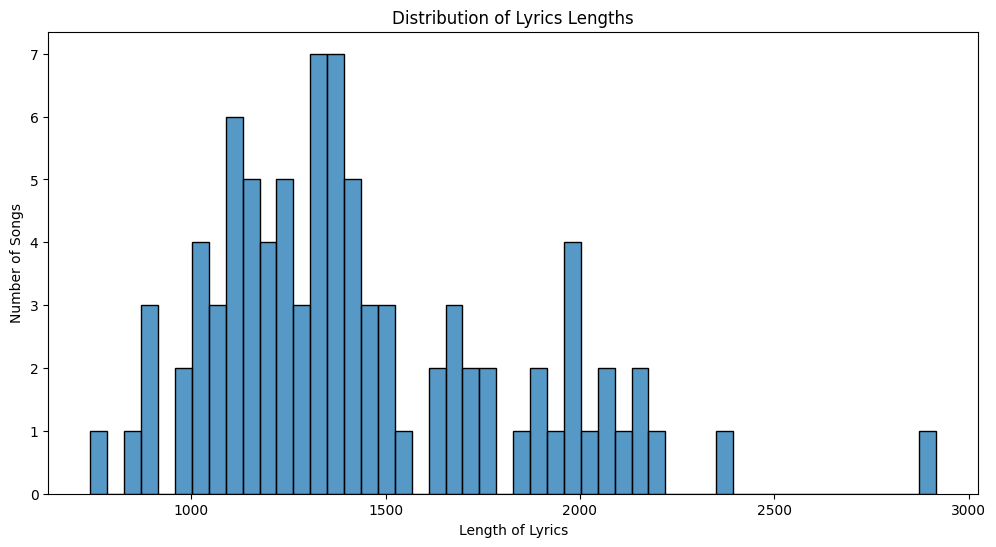

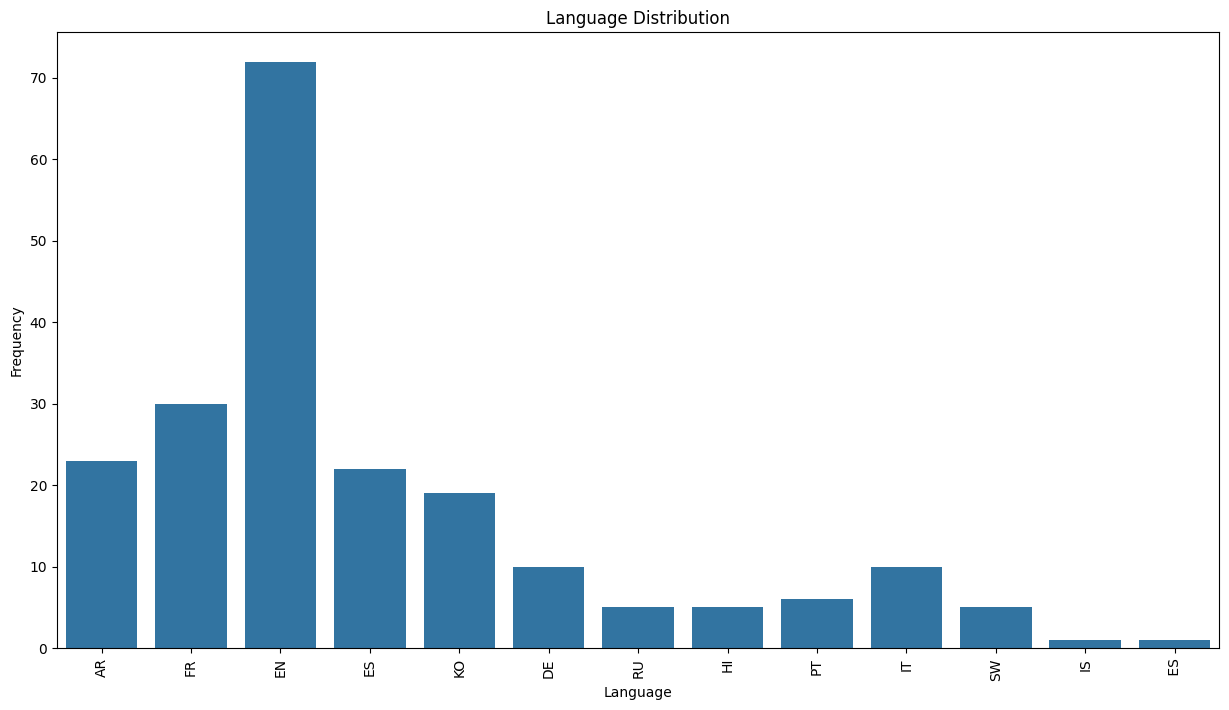

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Load the dataset
df = pd.read_csv('./New DataSets/processed_lyrics_data.csv')

# Strip whitespace from the column names just in case there are any leading/trailing spaces
df.columns = df.columns.str.strip()

# Overview of the dataset
print("Data shape:", df.shape)
print("First 5 rows:")
print(df.head())

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Text Analysis
# Calculate the length of each text entry
df['lyrics_length'] = df['Lyrics'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(12, 6))
sns.histplot(df['lyrics_length'], bins=50, kde=False)
plt.title('Distribution of Lyrics Lengths')
plt.xlabel('Length of Lyrics')
plt.ylabel('Number of Songs')
plt.show()

# Language Analysis
# Split the 'Languages' column into lists
df['LanguageList'] = df['languages'].str.split(',')

# Flatten the list of languages and count the occurrences of each language
all_languages = [lang for sublist in df['LanguageList'] for lang in sublist]
language_counts = Counter(all_languages)

# Make sure to remove any empty strings if there are any
language_counts.pop('', None)

# Plot the language distribution
plt.figure(figsize=(15, 8))  # Increase figure size to accommodate all labels
sns.barplot(x=list(language_counts.keys()), y=list(language_counts.values()))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate labels to prevent overlap
plt.show()

# Save the EDA results to a CSV if needed
eda_results = pd.DataFrame({
    'language': language_counts.keys(),
    'frequency': language_counts.values()
})
eda_results.to_csv('eda_results.csv', index=False)

# Note: Replace '/path/to/processed_lyrics_data.csv' and '/path/to/eda_results.csv' with your actual file paths.


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import re
import numpy as np
import ast  # Import Abstract Syntax Trees module for converting string representations of lists to lists

# Load the dataset
processed_data_df = pd.read_csv('./New DataSets/processed_lyrics_data.csv')

# Function to convert string representation of numbers to a list of integers
def str_to_int_list(s):
    # Use regular expression to find all numbers in the string
    numbers = re.findall(r'\d+', s)
    # Convert found numbers to integers
    return [int(num) for num in numbers]

# Apply this conversion to the 'PaddedLyrics' column
processed_data_df['PaddedLyrics'] = processed_data_df['PaddedLyrics'].apply(str_to_int_list)

# Convert lists to a numpy array
X = np.array(processed_data_df['PaddedLyrics'].tolist())

# Continue with your previous code for splitting the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Output the shapes of the splits to verify
print("Shapes of splits:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


NameError: name 'y' is not defined

In [ ]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 16.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 16.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.4/346.4 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 KB 10.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch

# Load the mBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels = number_of_labels)  # Update `number_of_labels` with the actual number of labels in your dataset

# Specify the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


/home/ramzidaher/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'torch'